In [1]:
# Uncomment and install if needed
# !pip install netCDF4 matplotlib cartopy numpy autograd
import sys
sys.path.append('..')
import numpy as np
from data.cyclones import extract_cyclones_data, make_cyclones_df, compute_gradients, plot_trajectories
from utils.pandas_numpy import convert_storm_df_to_numpy_array
from data.smooth_storms import smooth_one_storm_rbf

Variables in the NetCDF file:
numobs
sid
season
number
basin
subbasin
name
source_usa
source_jma
source_cma
source_hko
source_new
source_reu
source_bom
source_nad
source_wel
source_td5
source_td6
source_ds8
source_neu
source_mlc
time
iso_time
nature
lat
lon
wmo_wind
wmo_pres
wmo_agency
track_type
main_track_sid
dist2land
landfall
iflag
usa_agency
usa_atcf_id
usa_lat
usa_lon
usa_record
usa_status
usa_wind
usa_pres
usa_sshs
usa_r34
usa_r50
usa_r64
usa_poci
usa_roci
usa_rmw
usa_eye
tokyo_lat
tokyo_lon
tokyo_grade
tokyo_wind
tokyo_pres
tokyo_r50_dir
tokyo_r50_long
tokyo_r50_short
tokyo_r30_dir
tokyo_r30_long
tokyo_r30_short
tokyo_land
cma_lat
cma_lon
cma_cat
cma_wind
cma_pres
hko_lat
hko_lon
hko_cat
hko_wind
hko_pres
newdelhi_lat
newdelhi_lon
newdelhi_grade
newdelhi_wind
newdelhi_pres
newdelhi_ci
newdelhi_dp
newdelhi_poci
reunion_lat
reunion_lon
reunion_type
reunion_wind
reunion_pres
reunion_tnum
reunion_ci
reunion_rmw
reunion_r34
reunion_r50
reunion_r64
bom_lat
bom_lon
bom_type
bom_wind
b

/Users/annadodson/Documents/Anna/Student/AMATH563/kernel-pde-discovery/demo/../data/cyclones.py:37: UserWarning: Warning: converting a masked element to nan.
  storm_lat = np.array([float(x) for x in storm_lat])
/Users/annadodson/Documents/Anna/Student/AMATH563/kernel-pde-discovery/demo/../data/cyclones.py:40: UserWarning: Warning: converting a masked element to nan.
  storm_lon = np.array([float(x) for x in storm_lon])


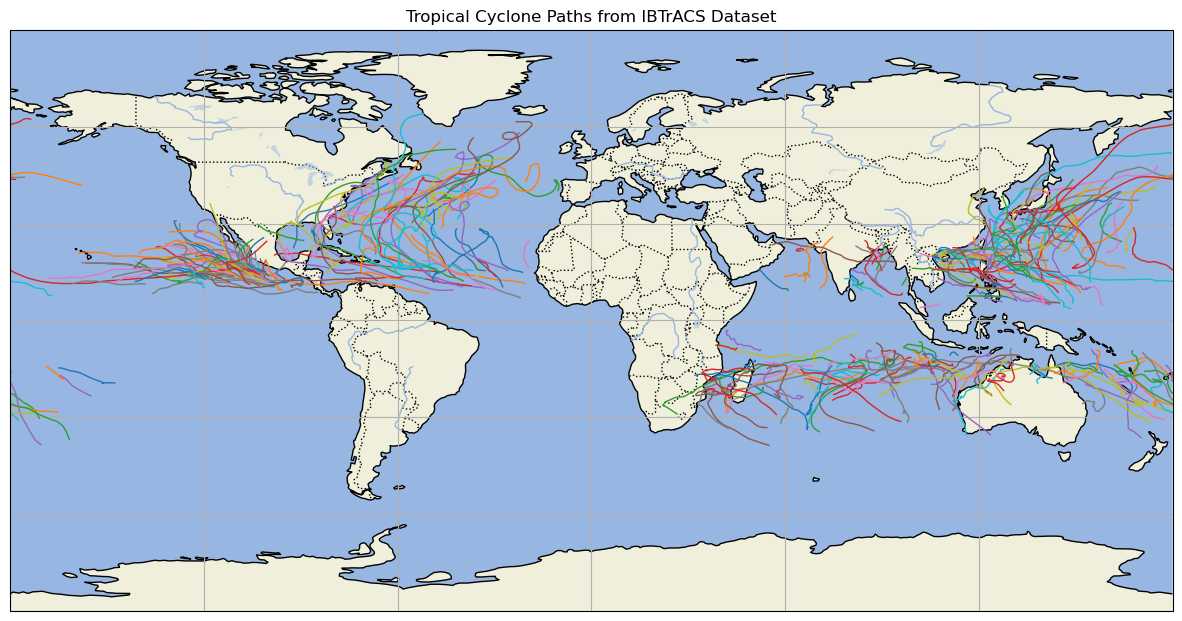

In [13]:
file_path = '../data/IBTrACS.last3years.v04r00.nc'

valid_storm_ids, time, lat, lon = extract_cyclones_data(file_path=file_path, print_all_vars=False)

plot_trajectories(valid_storm_ids, lat, lon)

In [3]:
# Now we would like to project the trajectory of the storms, interpolating between time points.
df_interp = make_cyclones_df(valid_storm_ids, time, lat, lon)

unique_storm_count = df_interp['storm_id'].nunique()
print(unique_storm_count)

# Normalize the features
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# df_interp[['lat', 'lon']] = scaler.fit_transform(df_interp[['lat', 'lon']])

307
307


In [4]:
# # Define a function to compute derivatives using second-order finite differences
# def compute_derivatives(df):
#     derivatives = []
#     for storm_id in df['storm_id'].unique():
#         storm_data = df[df['storm_id'] == storm_id]
#         time = storm_data['time'].values.astype(float)
#         lat = storm_data['lat'].values.astype(float)
#         lon = storm_data['lon'].values.astype(float)

#         # Compute the first and second derivatives using second-order finite differences
#         dt = np.gradient(time)
#         dlat_dt = np.gradient(lat, dt)
#         d2lat_dt2 = np.gradient(dlat_dt, dt)
#         dlon_dt = np.gradient(lon, dt)
#         d2lon_dt2 = np.gradient(dlon_dt, dt)

#         # Add the derivatives to the list
#         for i, t in enumerate(time):
#             derivatives.append([storm_id, t, dlat_dt[i], dlon_dt[i], d2lat_dt2[i], d2lon_dt2[i]])

#     # Create a DataFrame from the derivatives list
#     df_deriv = pd.DataFrame(derivatives, columns=['storm_id', 'time', 'lat_deriv', 'lon_deriv', 'lat_deriv2', 'lon_deriv2'])
#     return df_deriv


df_deriv = compute_gradients(df_interp)

df_deriv.head(50)



,storm_id,time,lat,lon,lat_grad,lon_grad,lat_grad2,lon_grad2
0,2021001S14136,0.000,-13.810000,136.399994,0.000000,0.000000,0.000000,0.000000
1,2021001S14136,0.125,-13.940509,136.524033,-0.130508,0.124039,-0.130508,0.124039
2,2021001S14136,0.250,-14.139999,136.649994,-0.199491,0.125961,-0.068982,0.001923
3,2021001S14136,0.375,-14.438504,136.774185,-0.298505,0.124191,-0.099014,-0.001770
4,2021001S14136,0.500,-14.710001,136.869995,-0.271497,0.095810,0.027008,-0.028381
5,2021001S14136,0.625,-14.817238,136.911301,-0.107237,0.041306,0.164260,-0.054504
6,2021001S14136,0.750,-14.860000,136.929993,-0.042762,0.018692,0.064475,-0.022614
7,2021001S14136,0.875,-14.926220,136.939545,-0.066220,0.009552,-0.023458,-0.009140
8,2021001S14136,1.000,-15.000001,137.000000,-0.073781,0.060455,-0.007561,0.050903
9,2021001S14136,1.125,-15.095480,137.160248,-0.095479,0.160248,-0.021698,0.099792


In [12]:
# Create a dictionary to hold the numpy arrays for each storm
storms_lat_lon_list = []
for storm_id, group in df_deriv.groupby('storm_id'):
    storms_lat_lon_list.append(convert_storm_df_to_numpy_array(group))
stacked_storm_data = np.stack(storms_lat_lon_list)
print(stacked_storm_data.shape)

ValueError: all input arrays must have the same shape

In [6]:
unique_storm_count = df_interp['storm_id'].nunique()
print(unique_storm_count)

307


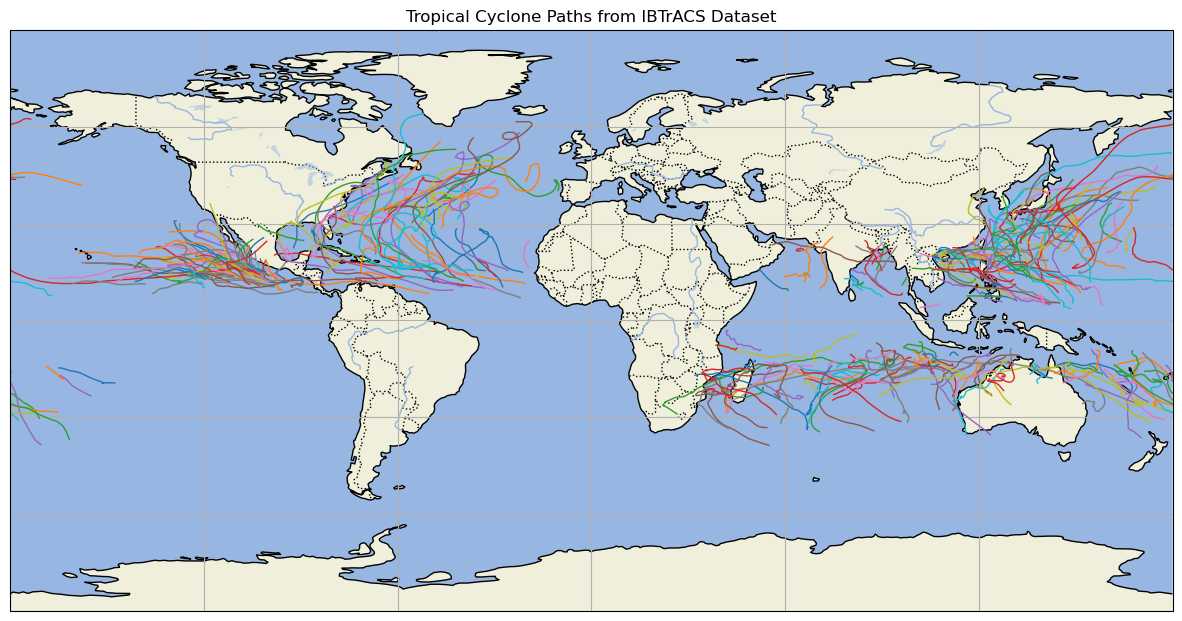

Index(['2021219N08193', '2023232N13300', '2021102N06144', '2023037S12119',
       '2023213N14257', '2023231N15313', '2023242N15339', '2021012S12086',
       '2024016S09094', '2021052S13130'],
      dtype='object', name='storm_id')


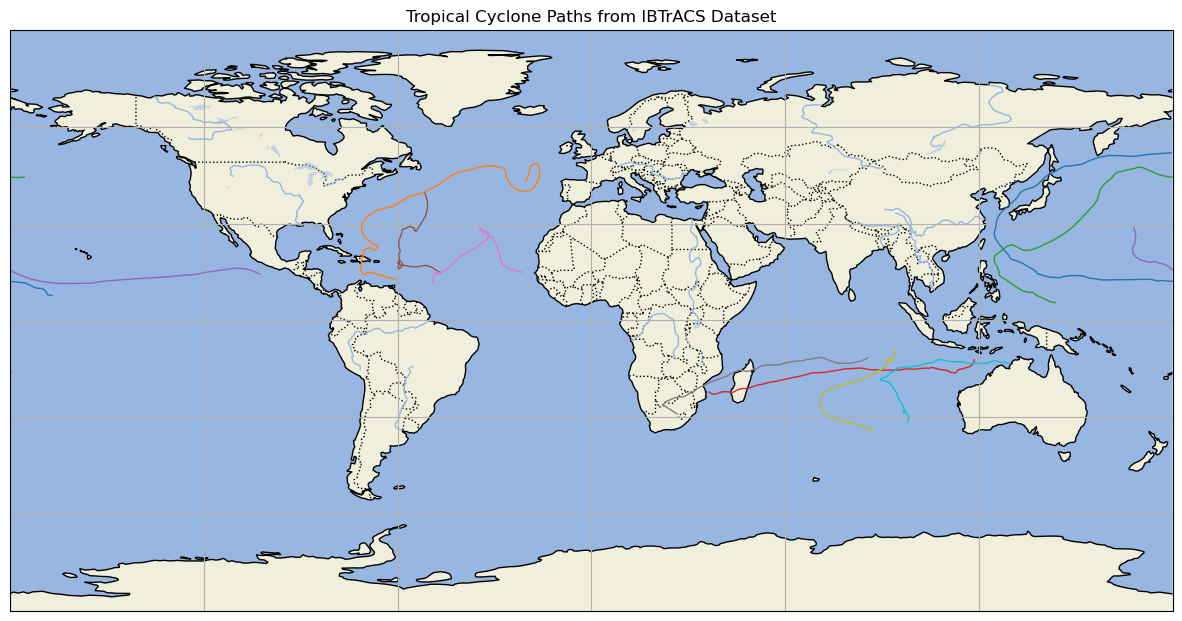

In [25]:
storm_lengths = df_interp.groupby('storm_id').size()
longest_storm_ids = storm_lengths.nlargest(10).index

print(longest_storm_ids)

# Initialize arrays for lat and lon
max_time_steps = df_interp.groupby('storm_id').size().max()
lat = np.full((len(longest_storm_ids), max_time_steps), np.nan)
lon = np.full((len(longest_storm_ids), max_time_steps), np.nan)

# Fill in lat and lon arrays
for i, storm_id in enumerate(longest_storm_ids):
    storm_data = df_interp[df_interp['storm_id'] == storm_id]
    time_steps = len(storm_data)
    lat[i, :time_steps] = storm_data['lat'].values
    lon[i, :time_steps] = storm_data['lon'].values

plot_trajectories(longest_storm_ids, lat, lon)



In [26]:
df = np.array(df_deriv)

#formatting everything as a np.array
ids = df[:,0]
u_ids = np.unique(ids)
ts = df[:,1]
us = df[:,np.array([2,3])]

S_LAT = []
S_LON = []

for j in range(len(u_ids)):
    t = ts[ids == u_ids[j]].astype('float')
    u = us[ids == u_ids[j],:].astype('float')
    LAT,LON = smooth_one_storm_rbf(t,u)
    
    S_LAT.append(np.copy(LAT))
    S_LON.append(np.copy(LON))

## WANT TO FORMAT LAT AND LON (#STORMS, MAX # TIMES)
##valid storm ids is just u_ids

m = 0
for j in range(len(u_ids)):
    m = max(m,np.sum(ids == u_ids[j]))
    
LAT_plot = np.ones([len(u_ids),m])*np.nan
LON_plot = np.ones([len(u_ids),m])*np.nan

for j in range(len(u_ids)):
    LAT_plot[j,range(len(S_LON[j][:,1]))] = S_LON[j][:,1]
    LON_plot[j,range(len(S_LAT[j][:,1]))] = S_LAT[j][:,1]
    
plot_trajectories(u_ids, LON_plot, LAT_plot)

NameError: name 'smooth_one_storm_rbf' is not defined